In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('Concrete_Data.xls')

In [2]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
df.shape

(1030, 9)

In [4]:
df.columns.values

array(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '], dtype=object)

In [5]:
features = df[['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)']]

labels = df['Concrete compressive strength(MPa, megapascals) ']

In [6]:
features.shape

(1030, 8)

In [7]:
labels.shape

(1030,)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
features,labels = shuffle(features,labels)
train_real_split = 0.03
x,xreal,y,yreal = train_test_split(features,labels,test_size=train_real_split,random_state=42)

In [9]:
x.shape, xreal.shape, y.shape, yreal.shape

((999, 8), (31, 8), (999,), (31,))

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
x = scaler_x.fit_transform(x)

scaler_xreal = MinMaxScaler()
xreal = scaler_xreal.fit_transform(xreal)

C:\Users\gjohn1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\gjohn1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [11]:
test_size = 0.15
Xtrain,Xtest,ytrain,ytest = train_test_split(x,y,test_size=test_size,random_state=42)

In [12]:
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((849, 8), (150, 8), (849,), (150,))

In [13]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt


def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1,len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+",linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors), "b-",linewidth=3,label="val")
    plt.xlabel("Training test size")
    plt.xlabel("RSME")





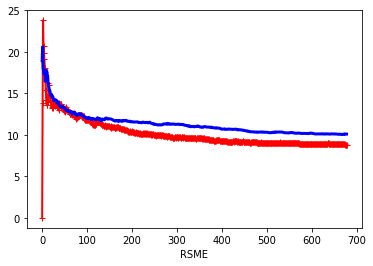

In [14]:
from sklearn.svm import SVR
svm_poly_reg = SVR(kernel="poly", degree=2, C=200, epsilon=0.01, gamma="auto")
plot_learning_curves(svm_poly_reg,Xtrain,ytrain)

In [15]:
yreal_predict = svm_poly_reg.predict(xreal)
errors_real = mean_squared_error(yreal,yreal_predict)
errors_real

65.3243144321333

In [16]:
ytest_predict = svm_poly_reg.predict(Xtest)
errors_real = mean_squared_error(ytest,ytest_predict)
errors_real

87.93950064685095

In [17]:
ytest = np.array(ytest)
for i in range(ytest.shape[0]):
    print("Predicted: {0}, Actual: {1}".format(ytest_predict[i].round(4),ytest[i].round(4)))

Predicted: 42.2676, Actual: 44.2078
Predicted: 44.6279, Actual: 40.3895
Predicted: 33.7984, Actual: 37.4248
Predicted: 57.507, Actual: 43.6983
Predicted: 57.5879, Actual: 43.6983
Predicted: 31.8647, Actual: 23.8352
Predicted: 33.0264, Actual: 37.3634
Predicted: 28.6635, Actual: 15.3408
Predicted: 52.6769, Actual: 45.3675
Predicted: 50.7627, Actual: 46.6844
Predicted: 54.9549, Actual: 60.2947
Predicted: 47.376, Actual: 47.8152
Predicted: 49.3677, Actual: 40.7591
Predicted: 42.7027, Actual: 52.4209
Predicted: 35.2673, Actual: 16.1096
Predicted: 21.2688, Actual: 21.9667
Predicted: 46.0958, Actual: 38.9968
Predicted: 40.0121, Actual: 24.4047
Predicted: 18.4287, Actual: 14.4997
Predicted: 21.0173, Actual: 13.2931
Predicted: 32.8522, Actual: 33.3065
Predicted: 35.9623, Actual: 24.1041
Predicted: 57.3929, Actual: 65.9966
Predicted: 30.644, Actual: 24.0655
Predicted: 48.0056, Actual: 28.2961
Predicted: 28.9161, Actual: 17.2362
Predicted: 43.9144, Actual: 57.2182
Predicted: 26.2707, Actual: 29.

In [18]:
yreal = np.array(yreal)
for i in range(yreal.shape[0]):
    print("Predicted: {0}, Actual: {1}".format(yreal_predict[i].round(4),yreal[i].round(4)))

Predicted: 47.7999, Actual: 39.6104
Predicted: 55.683, Actual: 50.6972
Predicted: 43.3238, Actual: 46.2473
Predicted: 16.2381, Actual: 15.5201
Predicted: 58.5663, Actual: 51.0212
Predicted: 48.5035, Actual: 41.6375
Predicted: 10.899, Actual: 8.5364
Predicted: 10.8508, Actual: 10.3359
Predicted: 12.9602, Actual: 11.4839
Predicted: 32.1418, Actual: 23.2216
Predicted: 25.9368, Actual: 13.3345
Predicted: 35.4924, Actual: 21.0221
Predicted: 51.5383, Actual: 53.9584
Predicted: 38.9748, Actual: 29.0683
Predicted: 23.3817, Actual: 16.8784
Predicted: 24.1364, Actual: 20.9187
Predicted: 29.4558, Actual: 26.7724
Predicted: 75.9723, Actual: 55.1581
Predicted: 17.6446, Actual: 10.3546
Predicted: 45.4297, Actual: 44.2988
Predicted: 64.4876, Actual: 68.2995
Predicted: 25.1207, Actual: 9.6175
Predicted: 30.3826, Actual: 34.2945
Predicted: 27.1347, Actual: 15.7483
Predicted: 80.4559, Actual: 79.2966
Predicted: 40.2964, Actual: 33.7567
Predicted: 40.881, Actual: 32.768
Predicted: 31.4123, Actual: 26.322